In [7]:
import os
import sys

current_dir =  os.getcwd()
#parent_dir = os.path.dirname(current_dir)
#sys.path.insert(0, parent_dir)

grandparent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, grandparent_dir)


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [8]:
gdp = pd.read_csv(f"{grandparent_dir}/data/raw/CAGDP1_2001_2021.csv", encoding='ISO-8859-1')


gdp = gdp.loc[:9533] #drop notes at the bottom


gdp['GeoFIPS'] = gdp['GeoFIPS'].fillna('').astype(str)
gdp['GeoFIPS'] = gdp['GeoFIPS'].str.strip(' "').astype(int)


#remove large regions
gdp = gdp[gdp['GeoFIPS'] % 10 != 0]

# focus on chain-type GDP
mask = gdp['Description'].str.startswith('Chain')
gdp = gdp[mask]


#drop Region number, Tablename, LineCode, IndustryClassification columns (the last one is empty anyway)
gdp = gdp.drop(gdp.columns[2:8], axis=1) 


gdp.replace('(NA)', np.nan, inplace=True)
gdp.replace('(NM)', np.nan, inplace=True)


nan_rows = gdp[gdp.isna().any(axis=1)]
#display(nan_rows)  # list of missing locations used in the data guide 

gdp.dropna(axis=0, inplace=True)

for column in gdp.columns[2:]:
    gdp[column] = gdp[column].astype(float)


assert gdp['GeoName'].is_unique

for column in gdp.columns[2:]:
    assert (gdp[column] > 0).all(), f"Negative values in {column}"
    assert (gdp[column].isna().sum() == 0), f"Missing values in {column}"
    assert (gdp[column].isnull().sum() == 0), f"Null values in {column}"
    assert (gdp[column] < 3000).all(), f"Values suspiciously large in {column}"

#TODO_Nikodem: investigate suspiciously large gdp values

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = gdp

standard_scaler = StandardScaler()

new_data = pd.DataFrame()
for column in data.columns:
    if data.dtypes[column] == 'float64':
        new = data[column].reshape(-1, 1)
        new = standard_scaler.fit_transform(new)
        min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
        new = min_max_scaler.fit_transform(new)
        new_data[column] = new.reshape(-1)
        



AttributeError: 'Series' object has no attribute 'reshape'

In [51]:
data = gdp

column  = '2021'

demeaned = data[column] - data[column].mean() 
standardized = demeaned / data[column].std()
scaled = ((standardized - standardized.mean()) / (standardized.max() - standardized.min())) * 2


print(
   scaled.mean(), scaled.min(), scaled.max()
)


-5.769265473855961e-19 -0.13601727693960877 1.8639827230603911


In [46]:

new_data = pd.DataFrame()
for column in data.columns:
    if data[column].dtype == 'float64':
        transformed = (2 * (data[column] - data[column].mean()) / data[column].std()) - 1
        print(column, "mean", transformed.mean())
        new_data[column] = transformed
       
        new_data[column] = (2 * (new_data[column] - new_data[column].min()) / 
        (new_data[column].max() - new_data[column].min()) - 1)
        assert (new_data[column] >= -1).all(), f"Values too small in {column}"
        #assert (new_data[column] < 1).all(), f"Values too large in {column}"
        #assert (new_data[column].mean() < 0.1), f"Mean too large in {column}"
        #assert (new_data[column].mean() > -0.1), f"Mean too small in {column}"



gdp.dtypes
#scaler.fit(your_data)

2001 mean -0.9999999999999997
2002 mean -1.0000000000000009
2003 mean -0.9999999999999986
2004 mean -1.0000000000000004
2005 mean -1.0000000000000007
2006 mean -0.9999999999999991
2007 mean -1.0000000000000002
2008 mean -0.9999999999999997
2009 mean -0.9999999999999986
2010 mean -1.000000000000002
2011 mean -1.0000000000000036
2012 mean nan


AssertionError: Values too small in 2012

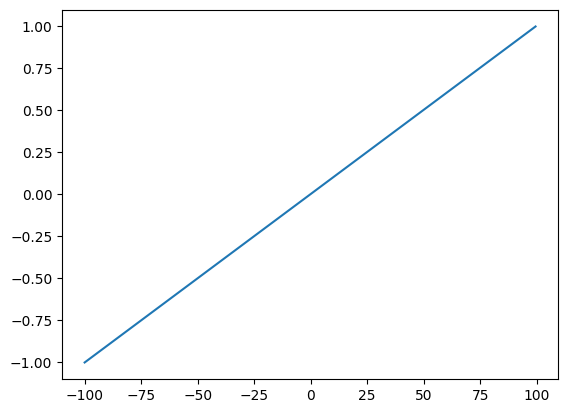

In [28]:
sequence = np.arange(-100.0, 100, 0.5)
new_sequence = (2 * (sequence - sequence.min()) / 
        (sequence.max() - sequence.min()) - 1)

plt.plot(sequence, new_sequence)
plt.show()


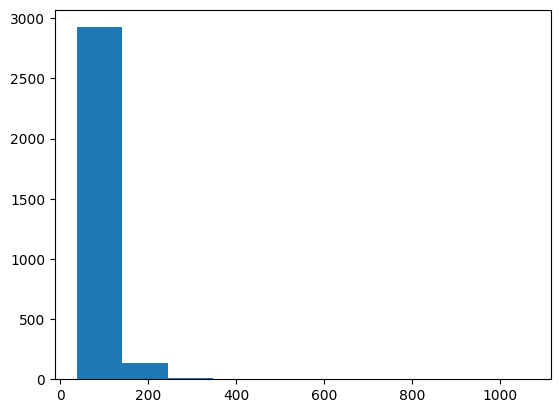

In [4]:
plt.hist(x = gdp['2018'])
plt.show()